(517, 14) (517,)
loss = 115.977723
accuracy = 0.678917
loss = 110.411866
accuracy = 0.702128
loss = 105.440735
accuracy = 0.702128
loss = 100.856699
accuracy = 0.725338
loss = 96.618101
accuracy = 0.736944
loss = 92.919840
accuracy = 0.742747
loss = 89.482414
accuracy = 0.748549
loss = 86.275562
accuracy = 0.756286
loss = 83.287140
accuracy = 0.752418
loss = 80.492079
accuracy = 0.756286
loss = 78.029662
accuracy = 0.756286
loss = 75.778074
accuracy = 0.760155
loss = 73.718000
accuracy = 0.765957
loss = 71.912060
accuracy = 0.767892
loss = 70.334309
accuracy = 0.781431
loss = 68.855497
accuracy = 0.787234
loss = 67.460333
accuracy = 0.787234
loss = 66.170778
accuracy = 0.793037
loss = 64.966055
accuracy = 0.800774
loss = 63.869357
accuracy = 0.806576
loss = 62.833260
accuracy = 0.812379
loss = 61.830992
accuracy = 0.816248
loss = 60.859442
accuracy = 0.823985
loss = 59.973043
accuracy = 0.831721
loss = 59.121179
accuracy = 0.833656
loss = 58.283742
accuracy = 0.835590
loss = 57.505557


accuracy = 0.851064
loss = 41.861599
accuracy = 0.851064
loss = 41.851404
accuracy = 0.851064
loss = 41.847823
accuracy = 0.851064
loss = 41.840528
accuracy = 0.851064
loss = 41.834330
accuracy = 0.851064
loss = 41.825937
accuracy = 0.851064
loss = 41.823291
accuracy = 0.851064
loss = 41.814570
accuracy = 0.851064
loss = 41.809285
accuracy = 0.851064
loss = 41.802791
accuracy = 0.851064
loss = 41.797602
accuracy = 0.851064
loss = 41.789381
accuracy = 0.851064
loss = 41.785900
accuracy = 0.851064
loss = 41.777325
accuracy = 0.851064
loss = 41.768877
accuracy = 0.851064
loss = 41.763859
accuracy = 0.851064
loss = 41.753573
accuracy = 0.851064
loss = 41.748588
accuracy = 0.851064
loss = 41.739101
accuracy = 0.851064
loss = 41.741477
accuracy = 0.851064
loss = 41.729418
accuracy = 0.851064
loss = 41.732946
accuracy = 0.851064
loss = 41.723726
accuracy = 0.851064
loss = 41.720938
accuracy = 0.851064
loss = 41.716676
accuracy = 0.851064
loss = 41.713957
accuracy = 0.851064
loss = 41.708699
a

accuracy = 0.851064
loss = 40.885129
accuracy = 0.851064
loss = 40.885608
accuracy = 0.851064
loss = 40.879414
accuracy = 0.851064
loss = 40.879207
accuracy = 0.851064
loss = 40.876489
accuracy = 0.851064
loss = 40.873951
accuracy = 0.851064
loss = 40.871466
accuracy = 0.851064
loss = 40.867447
accuracy = 0.851064
loss = 40.867204
accuracy = 0.852998
loss = 40.861917
accuracy = 0.852998
loss = 101.836466
accuracy = 0.497110
loss = 100.285926
accuracy = 0.491329
loss = 98.766239
accuracy = 0.491329
loss = 97.255899
accuracy = 0.485549
loss = 95.772164
accuracy = 0.485549
loss = 94.295777
accuracy = 0.473988
loss = 92.875056
accuracy = 0.473988
loss = 91.456135
accuracy = 0.468208
loss = 90.059881
accuracy = 0.456647
loss = 88.690328
accuracy = 0.456647
loss = 87.339356
accuracy = 0.456647
loss = 85.990050
accuracy = 0.450867
loss = 84.649755
accuracy = 0.445087
loss = 83.338443
accuracy = 0.439306
loss = 82.028730
accuracy = 0.445087
loss = 80.736893
accuracy = 0.450867
loss = 79.471264

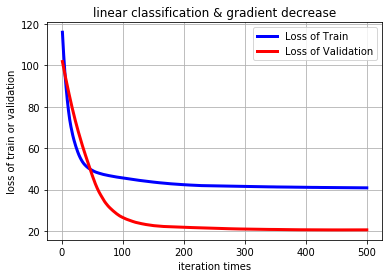

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

def loadDataSet():
	# 读取数据
	X,y=load_svmlight_file("australian_scale.txt")
	#将稀疏矩阵转化为完整特征矩阵
	X = X.todense()
	# 将数据集切分为训练集和验证集 
	X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=0)
	print(X_train.shape,y_train.shape)
	return X_train, X_validation, y_train, y_validation

def gradDescent(alpha,maxCycles,X_data,y_data):
	num = y_data.shape[0]    #样本数量
	# 线性模型参数正态分布初始化
	w = np.random.normal(size=(X_data.shape[1]))
	b = np.random.normal(size=1)
	losss = []
	tv = 0

	#迭代次maxCycles次
	for n in range(maxCycles):
		grad_w = np.ones(X_data.shape[1])*(np.linalg.norm(w,ord=2))
		grad_b = np.zeros(1)
		loss = np.power(np.linalg.norm(w,ord=2),2) / 2    #求w的第二范式
		error = 0
		C = 1/np.power(2,2)
		for i in range(num):
			y = np.dot( X_data[i][0].getA()[0], w ) + b
			if y_data[i] * y < 1:
				loss += C * max(0,1 - y_data[i] * y) 
				grad_w += - C * y_data[i] * X_data[i][0].getA()[0] 
				grad_b += - C * y_data[i] 
			if y > tv :
				y = 1
			else: y = -1
			if not y == y_data[i]:
				error += 1
		#更新模型参数
		w -= alpha * grad_w
		b -= alpha * grad_b
		losss.append(loss)
		print("loss = %f" % loss)
		print("accuracy = %f" % (1-error/num))
	return losss

def plotLossPerTime(n,losss_train,losss_validation):
	plt.xlabel('iteration times')
	plt.ylabel('loss of train or validation')
	plt.title('linear classification & gradient decrease')
	n_cycles = range(1,n+1)
	plt.plot(n_cycles, losss_train, label = "Loss of Train", color='blue', linewidth=3)
	plt.plot(n_cycles, losss_validation, label = "Loss of Validation", color='red', linewidth=3)
	plt.legend(loc=0)
	plt.grid()
	plt.show()

# main
X_train, X_validation, y_train, y_validation = loadDataSet()
alpha = 0.001
maxCycles = 500
losss_train = gradDescent(alpha,maxCycles,X_train,y_train)
losss_validation = gradDescent(alpha,maxCycles,X_validation,y_validation)
plotLossPerTime(maxCycles,losss_train,losss_validation)